In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torchvision.datasets as vdatasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random
import numpy as np
import os
DATA_PATH = os.environ['DATA_PATH']
%matplotlib inline

In [2]:
# Hyper Parameters 
INPUT_SIZE = 784
HIDDEN_SIZE = 256 # undercomplete !
EPOCH = 5
BATCH_SIZE = 100
LR = 0.01

In [3]:
# MNIST Dataset (Images and Labels)
train_dataset = vdatasets.MNIST(root=DATA_PATH+'MNIST/', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

# Dataset Loader (Input Pipline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE, 
                                           shuffle=True)

In [8]:
class DenosingAutoencoder(nn.Module):
    def __init__(self, input_size,hidden_size):
        super(DenosingAutoencoder, self).__init__()
        self.f = nn.Linear(input_size, hidden_size)
        self.g = nn.Linear(hidden_size, input_size)
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(0.5)
    def forward(self, x):
        h = self.sigmoid(self.f(x)) # nonlinearity
        h = self.dropout(h)
        r = self.sigmoid(self.g(h)) # nonlinearity
        return r

In [9]:
model = DenosingAutoencoder(INPUT_SIZE,HIDDEN_SIZE)

loss_function = nn.MSELoss()  
optimizer = optim.Adam(model.parameters(), lr=LR)

## TODO 

In [4]:
for (inputs,_) in train_loader:
    break

In [10]:
model.train()
for epoch in range(EPOCH):
    for i, (inputs, _) in enumerate(train_loader):
        # TODO : 트레이닝 코드를 작성하시오
        # 인풋에 torch.randn을 통해 noise를 추가하고 이를 Reconstruction하도록 학습
        inputs = Variable(inputs.view(inputs.size(0),-1)) # 100,1,28,28 => 100,784
        noised = inputs + 0.3*Variable(torch.randn(inputs.size()))
        
        model.zero_grad()
        reconstruction = model(noised)
        loss = loss_function(reconstruction, inputs)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f' 
                   % (epoch+1, EPOCH, i+1, len(train_dataset)//BATCH_SIZE, loss.data[0]))

Epoch: [1/5], Step: [100/600], Loss: 0.0325
Epoch: [1/5], Step: [200/600], Loss: 0.0255
Epoch: [1/5], Step: [300/600], Loss: 0.0251
Epoch: [1/5], Step: [400/600], Loss: 0.0247
Epoch: [1/5], Step: [500/600], Loss: 0.0247
Epoch: [1/5], Step: [600/600], Loss: 0.0240
Epoch: [2/5], Step: [100/600], Loss: 0.0236
Epoch: [2/5], Step: [200/600], Loss: 0.0214
Epoch: [2/5], Step: [300/600], Loss: 0.0224
Epoch: [2/5], Step: [400/600], Loss: 0.0231
Epoch: [2/5], Step: [500/600], Loss: 0.0222
Epoch: [2/5], Step: [600/600], Loss: 0.0215
Epoch: [3/5], Step: [100/600], Loss: 0.0217
Epoch: [3/5], Step: [200/600], Loss: 0.0226
Epoch: [3/5], Step: [300/600], Loss: 0.0215
Epoch: [3/5], Step: [400/600], Loss: 0.0213
Epoch: [3/5], Step: [500/600], Loss: 0.0197
Epoch: [3/5], Step: [600/600], Loss: 0.0219
Epoch: [4/5], Step: [100/600], Loss: 0.0216
Epoch: [4/5], Step: [200/600], Loss: 0.0214
Epoch: [4/5], Step: [300/600], Loss: 0.0222
Epoch: [4/5], Step: [400/600], Loss: 0.0206
Epoch: [4/5], Step: [500/600], L

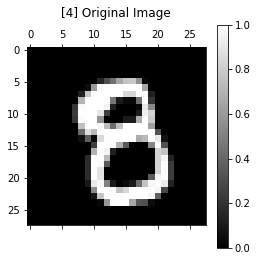

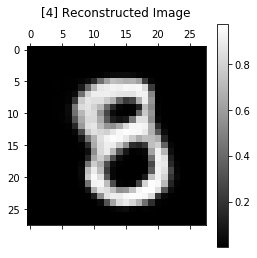

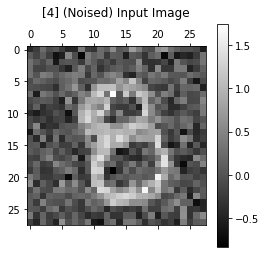

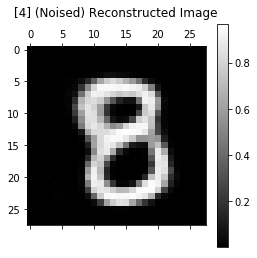

In [12]:
model.eval()
index = random.choice(range(10000))
test = train_dataset[index][0]

plt.matshow(np.reshape(test.numpy(), (28, 28)), cmap=plt.get_cmap('gray'))
plt.title("[" + str(epoch) + "] Original Image\n")
plt.colorbar()
plt.show()

recon = model(Variable(test).view(-1,28*28))

plt.matshow(np.reshape(recon.data.numpy(), (28, 28)), cmap=plt.get_cmap('gray'))
plt.title("[" + str(epoch) + "] Reconstructed Image\n")
plt.colorbar()
plt.show()

noised = Variable(test) + 0.3*Variable(torch.randn(test.size()))

plt.matshow(np.reshape(noised.data.numpy(), (28, 28)), cmap=plt.get_cmap('gray'))
plt.title("[" + str(epoch) + "] (Noised) Input Image\n")
plt.colorbar()
plt.show()

noised_recon = model(noised.view(-1,28*28))

plt.matshow(np.reshape(noised_recon.data.numpy(), (28, 28)), cmap=plt.get_cmap('gray'))
plt.title("[" + str(epoch) + "] (Noised) Reconstructed Image\n")
plt.colorbar()
plt.show()